In [20]:
import pandas as pd

#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

data.columns = ["city", "gender","age","income","ill"]

print("Ill or not?")
print(data.groupby("ill")["city"].count())
print("\nTotal records:", len(data))

Ill or not?
ill
No     137861
Yes     12139
Name: city, dtype: int64

Total records: 150000


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#our machine learning pieces
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import metrics
from sklearn import tree

print('Ready to proceed!')

Ready to proceed!


In [23]:
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

data.columns = ["city", "gender","age","income","ill"]
data.head()

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No


In [6]:
'''This dataset is fairly clean, we just need to represent it all as numbers instead of text labels. So that means we need to change the columns:

ill - instead of a No / Yes label we'll use 0 and 2 instead
city - this will break out the column into 8 different columns
gender - this will break out the column into 2 different columns'''

data["ill"].replace({"No":0,"Yes":2},inplace=True)

#change categorical values into numeric ones
data = pd.get_dummies(data,columns=['city','gender'])
data.head()

,age,income,ill,city_Edmonton,city_Halifax,city_Montreal,city_Ottawa,city_Regina,city_Toronto,city_Vancouver,city_Waterloo,gender_Female,gender_Male
0,41,40367,0,0,0,1,0,0,0,0,0,0,1
1,54,45084,0,0,0,1,0,0,0,0,0,0,1
2,42,52483,0,0,0,1,0,0,0,0,0,0,1
3,40,40941,0,0,0,1,0,0,0,0,0,0,1
4,46,50289,0,0,0,1,0,0,0,0,0,0,1


In [24]:
data.tail()

,city,gender,age,income,ill
149995,Edmonton,Male,48,93669,No
149996,Edmonton,Male,25,96748,No
149997,Edmonton,Male,26,111885,No
149998,Edmonton,Male,25,111878,No
149999,Edmonton,Female,37,87251,No


In [26]:
features = ["age",\
            "income",\
            "city_Edmonton",\
            "city_Halifax",\
            "city_Montreal",
            "city_Ottawa",\
            "city_Regina",\
            "city_Toronto",
            "city_Vancouver",\
            "city_Waterloo",\
            "gender_Female",\
            "gender_Male"]

X = data[features]

#we want to target the ill column
y=data.ill

KeyError: "['city_Edmonton', 'city_Halifax', 'city_Montreal', 'city_Ottawa', 'city_Regina', 'city_Toronto', 'city_Vancouver', 'city_Waterloo', 'gender_Female', 'gender_Male'] not in index"

In [9]:
'''Training and testing
Now that we have built our model we need to get the data ready for it. We do this by breaking it into two different pieces. The diagram shows a conceptualization of how this is proportioned.

Train Test Split

Training set - This is what is used to build the model. If we set this value too large the ML Model just memorizes the data so we need to be careful when setting this value. This is called overfitting the data.
Testing set - This is used to see if our guesses are correct
Before we were looking at the columns of the data, this investigation of training/testing looks at the rows of data.'''

'Training and testing\nNow that we have built our model we need to get the data ready for it. We do this by breaking it into two different pieces. The diagram shows a conceptualization of how this is proportioned.\n\nTrain Test Split\n\nTraining set - This is what is used to build the model. If we set this value too large the ML Model just memorizes the data so we need to be careful when setting this value. This is called overfitting the data.\nTesting set - This is used to see if our guesses are correct\nBefore we were looking at the columns of the data, this investigation of training/testing looks at the rows of data.'

In [27]:
#Training and test together make up 100% of the data!
#We start with a baseline of 30% of our data as testing

test_percent = 30
train_percent = 100 - test_percent

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=test_percent/100.0,
                                                   random_state=10)

In [28]:
'''Now the interesting part, we build our model, train it against the training set and see how it predicts against the testing set'''
#Create decision tree classifier object
treeClass = DecisionTreeClassifier()

#Train
treeClass = treeClass.fit(X_train,y_train)

#Predict
y_pred = treeClass.predict(X_test)

**Accuracy of the Model**

To see how good our machine learning model is we need to see how accurate our predictions are. Scikit has built in functions and metrics to do this for us.

In [29]:
print("Accuracy: ")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy: 
0.8455777777777778


In [30]:
data.ill.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#line 149120
person_x_yes = [32,82311,1,0,0,0,0,0,0,0,0,1]
person_x_yes = pd.DataFrame([person_x_yes], columns=X_test.columns)

print("Someone who is  ill")
print("Class predicted by model: ",treeClass.predict(person_x_yes))
print("Probability associated with the guess: ", treeClass.predict_proba(person_x_yes))

Someone who is  ill
Class predicted by model:  [2]
Probability associated with the guess:  [[0. 1.]]


In [34]:
#line 149121
person_x_no = [40,89780,1,0,0,0,0,0,0,0,1,0]

person_x_no = pd.DataFrame([person_x_no], columns=X_test.columns)

print("\nSomeone who is not ill")
print("Class predicted by model: ", treeClass.predict(person_x_no))
print("Probability associated with the guess: ", treeClass.predict_proba(person_x_no))


Someone who is not ill
Class predicted by model:  [0]
Probability associated with the guess:  [[1. 0.]]


In [39]:
pretend_person = pd.DataFrame([
        70, #age - FILL IN
        45000, #income - FILL IN
        0, #city_Edmonton - ONLY 1 city at a time
        0, #city_Halifax
        0, #city_Montreal
        0, #city_Ottawa
        0, #city_Regina
        1, #city_Toronto
        0, #city_Vancouver
        0, #city_Waterloo
        0, #gender_Female - ONLY 1 gender at a time
        1, #gender_Male
])

#turn our pretend person into a dataframe that is the correct dimensions
pretend_person = pretend_person.T
pretend_person.columns = X_test.columns

print("\Pretend person details")
print(pretend_person.head())

print("Pretend person Class predicted")
print(treeClass.predict(pretend_person))

print("Pretend person probability of guess")
print(treeClass.predict_proba(pretend_person))

\Pretend person details
   age  income  city_Edmonton  city_Halifax  city_Montreal  city_Ottawa  \
0   70   45000              0             0              0            0   

   city_Regina  city_Toronto  city_Vancouver  city_Waterloo  gender_Female  \
0            0             1               0              0              0   

   gender_Male  
0            1  
Pretend person Class predicted
[0]
Pretend person probability of guess
[[1. 0.]]


In [40]:
printed_tree = export_text(treeClass, feature_names=features)
print(printed_tree)

|--- income <= -35.00
|   |--- class: 2
|--- income >  -35.00
|   |--- income <= 29255.00
|   |   |--- income <= 29190.00
|   |   |   |--- income <= 3254.50
|   |   |   |   |--- income <= 2570.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  2570.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- income >  3254.50
|   |   |   |   |--- income <= 24960.00
|   |   |   |   |   |--- income <= 22569.00
|   |   |   |   |   |   |--- income <= 22544.50
|   |   |   |   |   |   |   |--- income <= 18228.50
|   |   |   |   |   |   |   |   |--- age <= 54.50
|   |   |   |   |   |   |   |   |   |--- age <= 42.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- age >  41.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- age >  42.50
|   |   |   |   |   |   |   |   |   |   |--- class

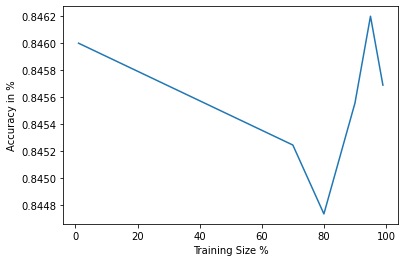

In [43]:
testing_percents = [1,5,10,20,30,99]
accuracy = []
training_percents = []

for test_ratio in sorted(testing_percents):
    X_train,X_test,y_train,y_test = train_test_split(X,\
                                                    y,\
                                                    test_size = test_percent/100.0,
                                                    random_state=10)
    treeClassTest = DecisionTreeClassifier()
    treeClassTest = treeClassTest.fit(X_train, y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    training_percents.append(100-test_ratio)
    
plt.plot(training_percents, accuracy)
plt.ylabel("Accuracy in %")
plt.xlabel("Training Size %")
plt.show()

**Tuning Parameters - Maximum depth of the tree**

We can restrict how deep our tree will be by setting max_depth in our DecisionTreeClassifier variable. Below is another example of trying different values in our ML model for this parameter and plotting out the accuracy of our model.

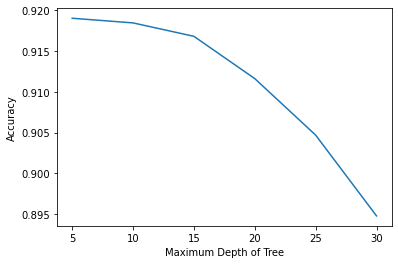

In [44]:
test_percent = 70
max_options = [5,10,15,20,25,30]

accuracy = []
tree_max = []

for max_d in sorted(max_options):
    X_train, X_test, y_train, y_test = train_test_split(X,\
                                                       y,\
                                                       test_size = test_percent/100.0,
                                                       random_state=10,
                                                       )
    #we set maximum depth in the DecisionTreeClassifier when we first create the variable
    treeClassTest = DecisionTreeClassifier(max_depth=max_d)
    treeClassTest = treeClassTest.fit(X_train, y_train)
    y_pred = treeClassTest.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    accuracy.append(score)
    tree_max.append(max_d)
    
plt.plot(max_options, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.show()

**Example 2**

We are going to look at a cancer survivor data set from the UCI machine learning archive.

In [45]:
cancer_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",header=None)
cancer_data.columns = ['age',"operation_year","positive_nodes","survival_status"]
cancer_data.describe()

,age,operation_year,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000
